# Unsupervised learning example: Clustering daily consumptions

In unsupervised learning, the classic task is **cluster analysis** in which hidden patterns or groups are found in the data. Most of the time unsupervised learning tasks have an *open solution*, so you have to interpret the results and check if they make sense.

**Objective:** This example uses data containing information about the annual electricity consumption of a household in Austin, USA. The objective is to find the optimal number of clusters to group the different daily consumption patterns of the household throughout the year. The data contains multiple households, so one must be selected (id=9922).

**Context:** This example presents an unsupervised learning problem in which different clustering algorithms and evaluation metrics are used and compared.

### Before we start:

* The file **15minute_data_austin_.csv** contains the input dataset for this example (attributes).

## **1. Import libraries and data**

In [70]:
# Import libreries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

# To suppress all warnings
warnings.filterwarnings("ignore")

# Select needed columns
columns_to_use = ['dataid', 'local_15min', 'grid']
df_activepower = pd.read_csv('Data/data_austin.csv', sep=';', usecols=columns_to_use)
df_activepower

,dataid,local_15min,grid
0,9922,17/01/2018 00:00,1.454
1,9922,17/01/2018 00:15,1.038
2,9922,17/01/2018 00:30,1.437
3,9922,17/01/2018 00:45,1.208
4,9922,17/01/2018 01:00,1.156
...,...,...,...
68530,9278,31/12/2018 22:45,1.481
68531,9278,31/12/2018 23:00,1.043
68532,9278,31/12/2018 23:15,0.740
68533,9278,31/12/2018 23:30,0.685


## **2. Understanding the data**

It is necessary to visualize and understand the data we are going to work with, as well as to know its characteristics.

1. How much data is there? How many attributes are there in the data?  
2. What do they mean?
3. Is there any missing data?
4. Statistical summary of the input data set.

In [71]:
# Dimension of input data (rows x columns)
df_activepower.shape

(68535, 3)

In [72]:
# Let's see what the data looks like
df_activepower.head()

,dataid,local_15min,grid
0,9922,17/01/2018 00:00,1.454
1,9922,17/01/2018 00:15,1.038
2,9922,17/01/2018 00:30,1.437
3,9922,17/01/2018 00:45,1.208
4,9922,17/01/2018 01:00,1.156


In [73]:
df_activepower.dtypes

dataid           int64
local_15min     object
grid           float64
dtype: object

**2. What do they mean?** 

* **[Dataid]**: numeric identification of each household
* **[local_15min]**: date and time format
* **[grid]**:  power consumed in each period [kW].

In [74]:
# Select the household with id = 9922 for this example
df_household = df_activepower.loc[df_activepower['dataid'] == 9922]

# Transform local_15min to datetime format with .to_datetime()
df_household['datetime'] = pd.to_datetime(df_household['local_15min'], format='%d/%m/%Y %H:%M')
print(df_household)

       dataid       local_15min   grid            datetime
0        9922  17/01/2018 00:00  1.454 2018-01-17 00:00:00
1        9922  17/01/2018 00:15  1.038 2018-01-17 00:15:00
2        9922  17/01/2018 00:30  1.437 2018-01-17 00:30:00
3        9922  17/01/2018 00:45  1.208 2018-01-17 00:45:00
4        9922  17/01/2018 01:00  1.156 2018-01-17 01:00:00
...       ...               ...    ...                 ...
33495    9922  31/12/2018 22:45  1.238 2018-12-31 22:45:00
33496    9922  31/12/2018 23:00  1.211 2018-12-31 23:00:00
33497    9922  31/12/2018 23:15  1.045 2018-12-31 23:15:00
33498    9922  31/12/2018 23:30  1.022 2018-12-31 23:30:00
33499    9922  31/12/2018 23:45  1.205 2018-12-31 23:45:00

[33500 rows x 4 columns]


In [75]:
df_household.dtypes

dataid                  int64
local_15min            object
grid                  float64
datetime       datetime64[ns]
dtype: object

In [76]:
df_household.dtypes
df_household.head()

,dataid,local_15min,grid,datetime
0,9922,17/01/2018 00:00,1.454,2018-01-17 00:00:00
1,9922,17/01/2018 00:15,1.038,2018-01-17 00:15:00
2,9922,17/01/2018 00:30,1.437,2018-01-17 00:30:00
3,9922,17/01/2018 00:45,1.208,2018-01-17 00:45:00
4,9922,17/01/2018 01:00,1.156,2018-01-17 01:00:00


In [77]:
# Remove household dataid and local_15min column
df_household = df_household.drop(['dataid', 'local_15min'], axis=1)
df_household

,grid,datetime
0,1.454,2018-01-17 00:00:00
1,1.038,2018-01-17 00:15:00
2,1.437,2018-01-17 00:30:00
3,1.208,2018-01-17 00:45:00
4,1.156,2018-01-17 01:00:00
...,...,...
33495,1.238,2018-12-31 22:45:00
33496,1.211,2018-12-31 23:00:00
33497,1.045,2018-12-31 23:15:00
33498,1.022,2018-12-31 23:30:00


In [78]:
# Convert the column 'datetime' to index.
df_household = df_household.set_index('datetime')
df_household

,grid
datetime,
2018-01-17 00:00:00,1.454
2018-01-17 00:15:00,1.038
2018-01-17 00:30:00,1.437
2018-01-17 00:45:00,1.208
2018-01-17 01:00:00,1.156
...,...
2018-12-31 22:45:00,1.238
2018-12-31 23:00:00,1.211
2018-12-31 23:15:00,1.045


In [79]:
# Show the new row x column data dimensions
df_household.shape

(33500, 1)

In [80]:
# Check whether there is any categorical data to be transformed
df_household.dtypes

grid    float64
dtype: object

**3. Is any data missing?** A check is made to see if any data is missing, and then empty cells are counted.
In this case, no data is missing in the input data set (there are no *Nan* values).

In [81]:
df_household.isna().sum()
df_household

,grid
datetime,
2018-01-17 00:00:00,1.454
2018-01-17 00:15:00,1.038
2018-01-17 00:30:00,1.437
2018-01-17 00:45:00,1.208
2018-01-17 01:00:00,1.156
...,...
2018-12-31 22:45:00,1.238
2018-12-31 23:00:00,1.211
2018-12-31 23:15:00,1.045


**4. Summary statistics of the input data set:** Descriptive statistics collects and analyzes the input data set with the objective of describing the characteristics and behaviors of this set through the following summary measures: total number of observations (count), mean (mean), standard deviation (std), minimum value (min), maximum value (max) and the values of the different quartiles (25%, 50%, 75%).

In [82]:
# Evaluate the nature of the data with descriptive statistics.
df_household.describe()

,grid
count,33500.000000
mean,2.046866
std,1.502420
min,0.252000
25%,0.940000
50%,1.901000
75%,2.583250
max,13.108000


## **3. Visualize the data**

A visual way to understand the input data. 
1. Histogram
2. Density curve
3. Boxplots

**1. Histogram**

Graphical representation of each of the attributes in the form of bars, where the surface of the bar is proportional to the frequency of the values represented.

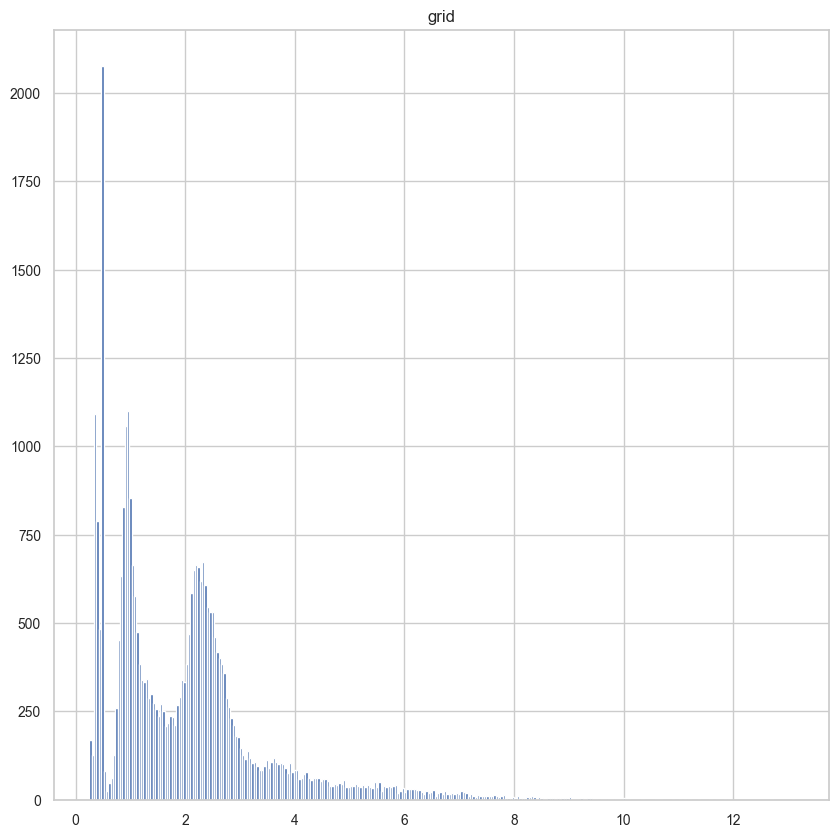

In [83]:
histogram = df_household.hist(xlabelsize=10, ylabelsize=10, bins=300, figsize=(10, 10))

**2. Density graph**

Visualize the distribution of the data. It is a variable of the histogram, but eliminates noise, so they are better for determining the distribution shape of an attribute. Density plot spikes help show where values are most concentrated. 

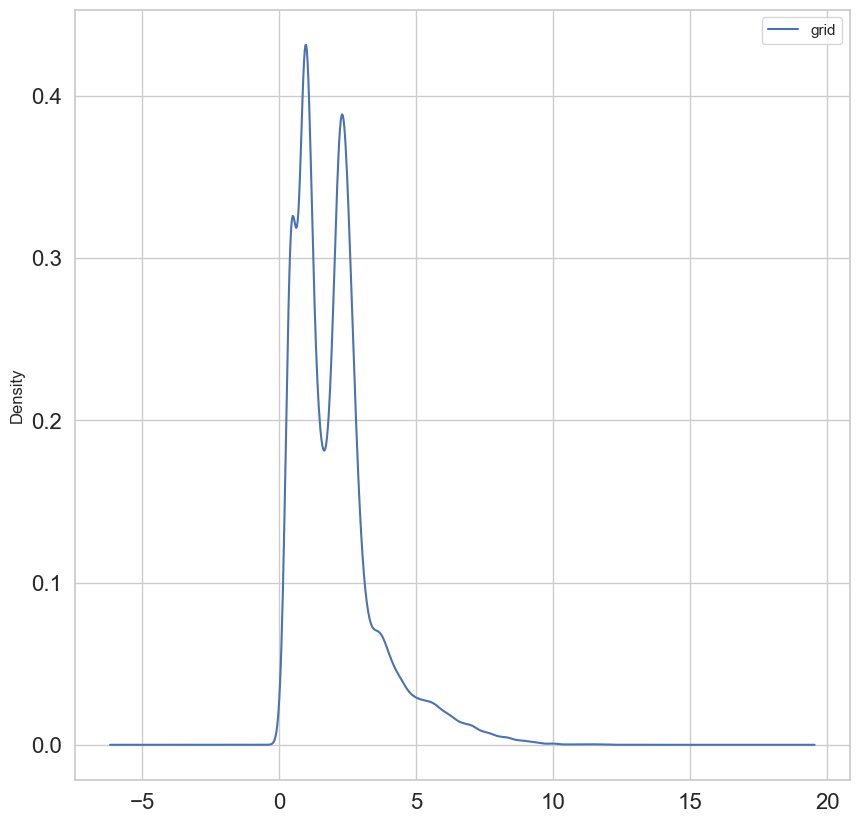

In [84]:
density = df_household.plot(kind='kde', legend=True, layout=(1, 1), figsize=(10, 10),
                        fontsize=16, stacked=True) 

**3. Boxplots** 

The boxplot allows us to identify outliers and compare distributions. In addition, we know how 50% of the values are distributed (inside the box). 

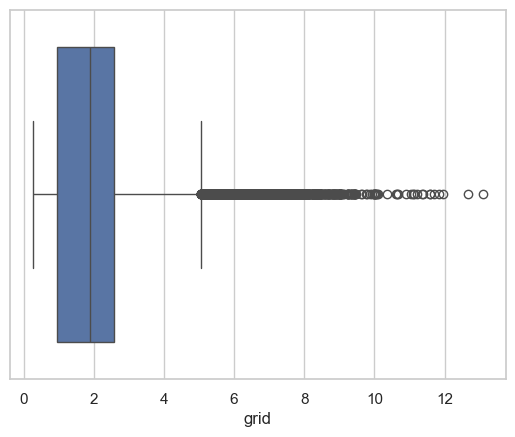

In [85]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df_household["grid"])

## *4. Prepare the data*

1. Data cleaning and restructuring
2. Transform


Transform the data to obtain the average hourly power. Each row will represent 1h.

In [105]:
df_household_hourly = df_household.resample('H').mean()
df_household_hourly

,grid
datetime,
2018-01-17 00:00:00,1.28425
2018-01-17 01:00:00,1.26450
2018-01-17 02:00:00,1.33300
2018-01-17 03:00:00,1.18200
2018-01-17 04:00:00,1.16975
...,...
2018-12-31 19:00:00,2.65350
2018-12-31 20:00:00,2.67400
2018-12-31 21:00:00,4.30075


In [106]:
# Create a new column with the hour
df_household_hourly['hour'] = df_household_hourly.index.hour
df_household_hourly

,grid,hour
datetime,,
2018-01-17 00:00:00,1.28425,0
2018-01-17 01:00:00,1.26450,1
2018-01-17 02:00:00,1.33300,2
2018-01-17 03:00:00,1.18200,3
2018-01-17 04:00:00,1.16975,4
...,...,...
2018-12-31 19:00:00,2.65350,19
2018-12-31 20:00:00,2.67400,20
2018-12-31 21:00:00,4.30075,21


In [88]:
# The new index now contains only the date (DD/MM/YYYYYY).
df_household_hourly.index = df_household_hourly.index.date
df_household_hourly.head()

,grid,hour
2018-01-17,1.28425,0
2018-01-17,1.26450,1
2018-01-17,1.33300,2
2018-01-17,1.18200,3
2018-01-17,1.16975,4


In [89]:
# Create a column with the average power of each hour 
df_household_pivot = df_household_hourly.pivot(columns='hour')
df_household_pivot = df_household_pivot.dropna()

df_household_pivot.head()

grid                                                        \
hour             0        1        2        3        4        5        6    
2018-01-17  1.28425  1.26450  1.33300  1.18200  1.16975  1.45550  1.34650   
2018-01-18  1.32600  1.21750  1.36875  1.13925  1.17775  1.43775  1.33775   
2018-01-19  1.21200  1.29750  1.10275  1.08825  1.12450  1.16650  1.11525   
2018-01-20  1.08925  1.08125  1.11825  1.05975  1.12675  1.08775  1.12525   
2018-01-21  0.90800  0.88075  1.03975  0.82750  1.02300  0.98700  1.07275   

                                       ...                             \
hour             7        8        9   ...       14       15       16   
2018-01-17  1.67500  3.33525  2.96650  ...  3.48850  3.47500  2.99525   
2018-01-18  1.34300  2.51750  2.68600  ...  2.69000  2.77850  2.70525   
2018-01-19  1.30150  1.68525  2.06150  ...  2.46725  2.25600  2.60200   
2018-01-20  1.09100  1.53600  2.18075  ...  2.21900  2.25625  2.18575   
2018-01-21  1.19575  1.49650  2.45325  ...  2.76200  2.90275  2.70900   

                                                                          
hour             17       18       19       20       21       22      23  
2018-01-17  5.05475  3.07300  2.92225  2.71925  2.81200  1.99375  1.3035  
2018-01-18  3.05175  2.99225  2.61175  2.59775  2.66325  1.26450  1.2275  
2018-01-19  2.38925  2.56550  2.71550  6.05875  2.66100  2.26025  1.1555  
2018-01-20  2.60575  2.54750  2.44475  2.48825  2.73000  1.18325  1.1970  
2018-01-21  2.76900  2.78775  2.67200  3.27650  2.76150  3.36600  2.1470  

[5 rows x 24 columns]

### Plot the transformed data
Each line shows the hourly consumption for one day of the year. 

<Axes: title={'center': 'Daily Consumption'}, xlabel='None,hour'>

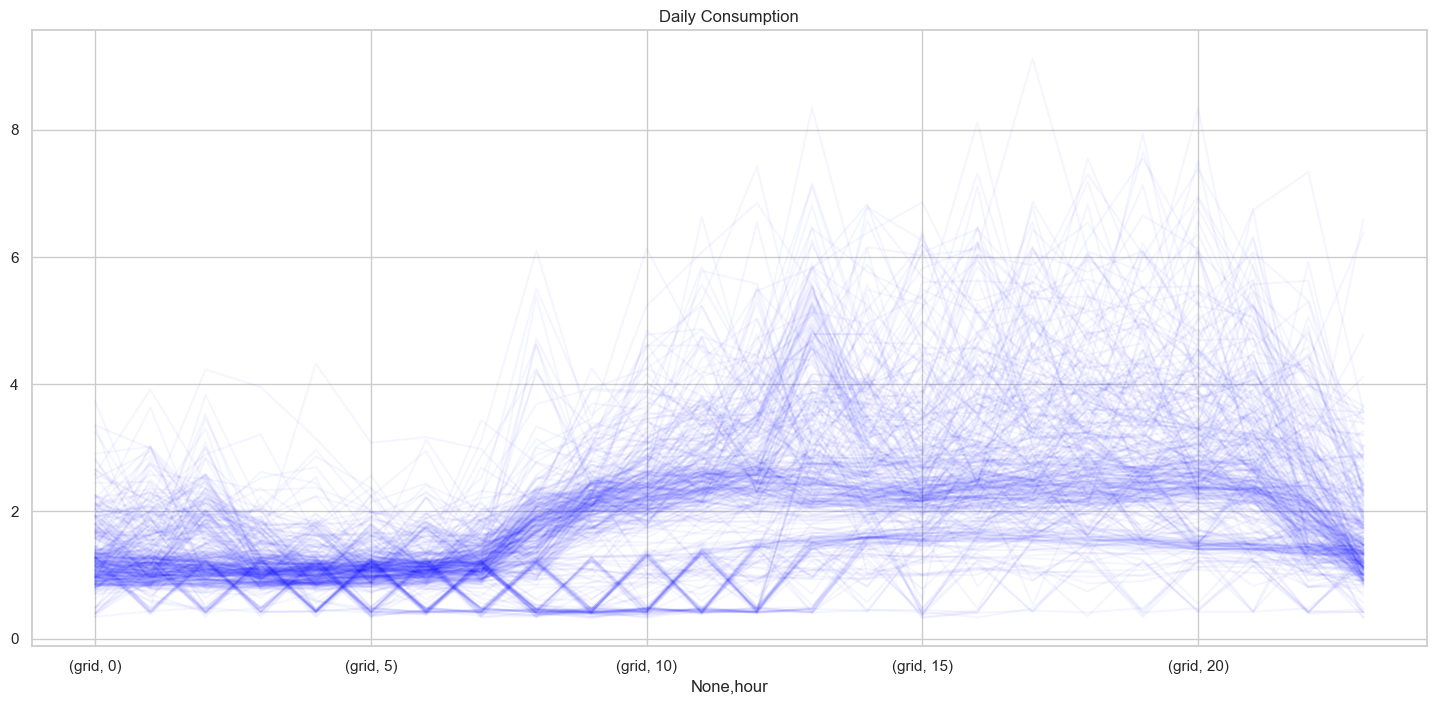

In [90]:
# Hourly consumption. Dataframe has to be transposed.
df_household_pivot.T.plot(figsize=(18, 8), title='Daily Consumption', legend=False, color='blue', alpha=0.04)

**2. Transformation**. 

The data is scaled using the *MinMaxScaler()* method

In [91]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = df_household_pivot.values.copy()
X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.278402,0.250829,0.254962,0.232494,0.209138,0.410831,0.351616,0.434184,0.520019,0.673323,...,0.479272,0.481980,0.341937,0.532405,0.378223,0.340415,0.290615,0.378198,0.230531,0.155759
1,0.290737,0.237561,0.264149,0.220662,0.211143,0.404390,0.348500,0.327268,0.378282,0.601971,...,0.354827,0.375392,0.304697,0.302340,0.367015,0.299569,0.275263,0.354706,0.125509,0.143643
2,0.257054,0.260145,0.195799,0.206546,0.197794,0.305969,0.269255,0.313904,0.234032,0.443116,...,0.320112,0.295432,0.291438,0.226246,0.307783,0.313217,0.712575,0.354351,0.268911,0.132164
3,0.220786,0.199097,0.199782,0.198658,0.198358,0.277395,0.272816,0.246115,0.208164,0.473450,...,0.281423,0.295470,0.237985,0.251113,0.305285,0.277601,0.261427,0.365248,0.113807,0.138780
4,0.167233,0.142494,0.179611,0.134376,0.172349,0.240838,0.254118,0.279849,0.201317,0.542766,...,0.366048,0.394407,0.305178,0.269864,0.338631,0.307495,0.361026,0.370223,0.428155,0.290235


## 5. Unsupervised Learning Model Building: Data Clustering using K-means

The data are grouped using the algorithm [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) and evaluation metrics [silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). The K-means algorithm needs to be told the number of clusters into which you want to group the data. You run the algorithm for several clusters and then compare the results using the silhouette_score metric, which will indicate the optimal number of clusters.

### Optimal number of clusters: Silhouette Coefficient
The Silhouette Coefficient is used, where the best value is 1 and the worst value is -1. Values close to 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, since a different cluster is more similar. Check documentation here: [sklearn.metrics.silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

In [92]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []

# Evaluate the K-means algorithm for a range of [2,15] clusters. 
n_cluster_list = np.arange(2, 16).astype(int)

In [93]:
# Iteration to evaluate K-means for different number of clusters (n_clusters)
for n_cluster in n_cluster_list:
    kmeans = KMeans(n_clusters=n_cluster, random_state=1990)
    cluster_found = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_, random_state=0))

In [94]:
silhouette_scores

[0.31035974491315366,
 0.28891071382363814,
 0.24225278449077,
 0.16070811155437933,
 0.12702650966787052,
 0.11814021315042667,
 0.11517783244319828,
 0.11898074748680544,
 0.0904967145537326,
 0.08737241276637549,
 0.09292170355726512,
 0.059991595817668004,
 0.060664742798097075,
 0.05887512279782658]

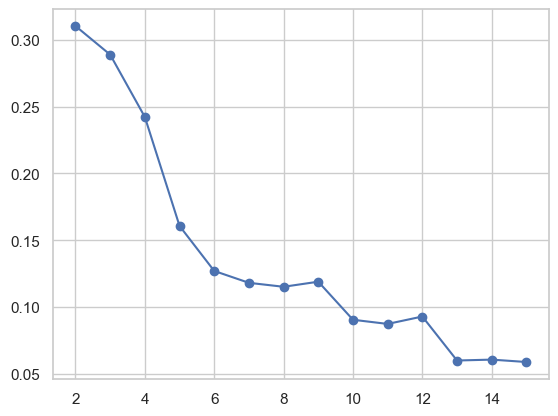

In [95]:
silhouette_metric = pd.DataFrame(index=n_cluster_list, columns=['silhouette_score'], data=silhouette_scores)
plt.plot(silhouette_metric, marker='o') 

In [96]:
# Train the K-means for the optimal number of clusters given the result of the Silhouette method.


kmeans = KMeans(n_clusters=2 , random_state=1990)  # write here the optimal number of clusters
cluster_found = kmeans.fit_predict(X_scaled)
cluster_found_sr = pd.Series(cluster_found, name='cluster')
cluster_found_sr


0      0
1      1
2      1
3      1
4      1
      ..
343    1
344    1
345    1
346    1
347    1
Name: cluster, Length: 348, dtype: int32

In [97]:

# Create a multindex of the type: (date,cluster to which the day belongs)
df_household_pivot_clusters = df_household_pivot.set_index(cluster_found_sr, append=True)
df_household_pivot_clusters.index

MultiIndex([(2018-01-17, 0),
            (2018-01-18, 1),
            (2018-01-19, 1),
            (2018-01-20, 1),
            (2018-01-21, 1),
            (2018-01-22, 1),
            (2018-01-23, 1),
            (2018-01-24, 1),
            (2018-01-25, 1),
            (2018-01-26, 1),
            ...
            (2018-12-22, 1),
            (2018-12-23, 1),
            (2018-12-24, 1),
            (2018-12-25, 0),
            (2018-12-26, 1),
            (2018-12-27, 1),
            (2018-12-28, 1),
            (2018-12-29, 1),
            (2018-12-30, 1),
            (2018-12-31, 1)],
           names=[None, 'cluster'], length=348)

In [98]:
df_household_pivot_clusters.head(20)

grid                                               \
hour                     0        1        2        3        4        5    
           cluster                                                         
2018-01-17 0        1.28425  1.26450  1.33300  1.18200  1.16975  1.45550   
2018-01-18 1        1.32600  1.21750  1.36875  1.13925  1.17775  1.43775   
2018-01-19 1        1.21200  1.29750  1.10275  1.08825  1.12450  1.16650   
2018-01-20 1        1.08925  1.08125  1.11825  1.05975  1.12675  1.08775   
2018-01-21 1        0.90800  0.88075  1.03975  0.82750  1.02300  0.98700   
2018-01-22 1        0.97575  0.85600  1.09300  0.95575  0.91150  0.87900   
2018-01-23 1        1.03625  1.20600  1.11125  1.09850  1.14975  1.43450   
2018-01-24 1        1.16575  1.27625  1.13000  1.08175  1.16900  1.37175   
2018-01-25 1        1.12325  1.15675  1.17025  1.03875  1.11600  1.15150   
2018-01-26 1        1.24525  1.09950  1.00475  1.08900  1.12725  1.17700   
2018-01-27 1        1.10175  0.96475  0.86725  1.01300  0.84425  1.11775   
2018-01-28 1        0.81025  1.31675  1.02350  1.12550  1.03600  1.02600   
2018-01-29 1        1.06425  1.03775  1.11325  0.88575  1.10000  1.20250   
2018-01-30 1        1.09975  1.15775  1.09325  1.05700  1.18350  1.15800   
2018-01-31 1        1.95400  1.12250  1.15900  0.96375  1.15675  1.13875   
2018-02-01 1        1.72675  0.97300  0.93000  0.88500  0.89075  1.00275   
2018-02-02 1        1.13150  1.00375  0.99025  1.11825  1.13400  1.55800   
2018-02-03 1        1.17600  1.19075  1.20275  1.07775  1.10100  0.99275   
2018-02-04 1        1.16025  1.15650  3.08325  1.01575  1.02150  0.99575   
2018-02-05 1        1.05475  1.01425  1.13325  0.84800  1.06400  0.96825   

                                                        ...                    \
hour                     6        7        8        9   ...       14       15   
           cluster                                      ...                     
2018-01-17 0        1.34650  1.67500  3.33525  2.96650  ...  3.48850  3.47500   
2018-01-18 1        1.33775  1.34300  2.51750  2.68600  ...  2.69000  2.77850   
2018-01-19 1        1.11525  1.30150  1.68525  2.06150  ...  2.46725  2.25600   
2018-01-20 1        1.12525  1.09100  1.53600  2.18075  ...  2.21900  2.25625   
2018-01-21 1        1.07275  1.19575  1.49650  2.45325  ...  2.76200  2.90275   
2018-01-22 1        1.10900  1.29250  1.93250  2.20900  ...  2.62250  2.70425   
2018-01-23 1        1.19000  1.35925  1.34625  2.48675  ...  2.18850  2.29550   
2018-01-24 1        1.16550  1.45900  1.76400  2.10975  ...  2.23025  2.28175   
2018-01-25 1        1.32775  1.30075  1.64450  2.42750  ...  2.56100  2.39675   
2018-01-26 1        1.33775  1.14550  1.80200  2.43350  ...  2.83600  2.84300   
2018-01-27 1        0.97650  1.04425  1.93325  2.29650  ...  2.33700  2.35650   
2018-01-28 1        1.13225  1.08350  1.59300  1.83750  ...  2.34625  2.22075   
2018-01-29 1        1.20725  1.34375  2.22275  2.21750  ...  2.74000  3.81300   
2018-01-30 1        1.02850  1.39325  2.05475  2.27425  ...  2.25050  2.36775   
2018-01-31 1        1.12975  1.18625  1.46300  2.20200  ...  2.20250  2.34100   
2018-02-01 1        1.24025  1.19550  1.16325  2.19675  ...  2.75875  2.67800   
2018-02-02 1        2.41475  2.03450  2.11800  2.00200  ...  2.07675  1.82875   
2018-02-03 1        1.05275  1.07225  1.08400  1.09425  ...  1.33400  1.25650   
2018-02-04 1        1.00325  1.03125  0.92475  1.07000  ...  0.94975  0.99375   
2018-02-05 1        1.04825  1.18475  1.15400  1.18925  ...  1.09475  1.01400   

                                                                          \
hour                     16       17       18       19       20       21   
           cluster                                                         
2018-01-17 0        2.99525  5.05475  3.07300  2.92225  2.71925  2.81200   
2018-01-18 1        2.70525  3.05175  2.99225  2.61175  2.59775  2.66325   
2018-01-19 1        2.60200  2

[0, 1]


Text(0.5, 0, 'Hours')

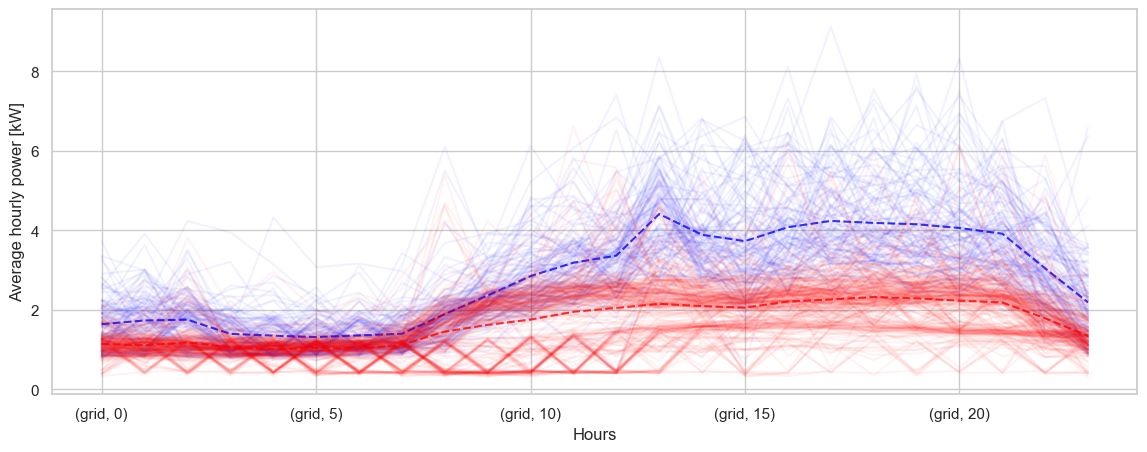

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))
color_list = ['blue',  'red']
cluster_values = sorted(df_household_pivot_clusters.index.get_level_values('cluster').unique())
print(cluster_values)

for cluster, color in zip(cluster_values, color_list):
    # plot every line of both clusters
    df_household_pivot_clusters.xs(cluster, level=1).T.plot(ax=ax, legend=False, alpha=0.05, color=color)
    # plot the mean consumption of each cluster
    df_household_pivot_clusters.xs(cluster, level=1).mean().plot(ax=ax, color=color, legend=False, alpha=0.8, ls='--')

ax.set_ylabel('Average hourly power [kW]')
ax.set_xlabel('Hours')

K-means has found the clusters with the following characteristics, looking at the graph above:
* One of the clusters concentrates the highest consumption patterns with the highest consumption peaks.
* The other concentrates a lower average hourly power consumption.

## Validating results with Dimensionality Reduction (PCA)
Principal Component Analysis (PCA) is a statistical method that simplifies the complexity of sample spaces with many dimensions while preserving their information. The number of features is reduced from 24 to 2. 
One way to validate the results of the clustering algorithm is by dimensionality reduction techniques. Note that the PCA does not know anything about the groups found by K-means.

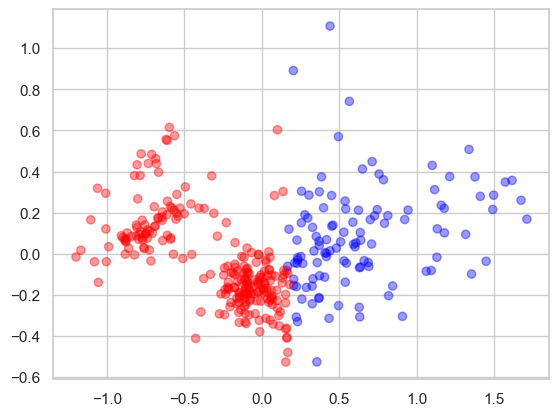

In [100]:
from sklearn.decomposition import PCA
import matplotlib.colors

pca = PCA(n_components=2, random_state=1990)
results_pca = pca.fit_transform(X_scaled)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(cluster_values, color_list)

plt.scatter(results_pca[:, 0], results_pca[:, 1],
            c=df_household_pivot_clusters.index.get_level_values('cluster'),
            cmap=cmap,
            alpha=0.4,
            )
plt.show()

In [101]:
results_pca

array([[ 0.43419386, -0.3144188 ],
       [ 0.15395038, -0.23928866],
       [ 0.02696367, -0.0405361 ],
       [-0.10953191, -0.21355664],
       [ 0.03296207, -0.16993238],
       [-0.10557991, -0.2338704 ],
       [ 0.054605  , -0.22614844],
       [-0.08975934, -0.09244266],
       [ 0.11197733, -0.35140994],
       [ 0.13120435, -0.14168828],
       [-0.07474489, -0.22817794],
       [-0.09706428, -0.09322576],
       [ 0.15353853, -0.19836982],
       [-0.02863203, -0.1390382 ],
       [-0.08139039, -0.09778551],
       [ 0.16304658, -0.40733772],
       [-0.19712622, -0.09186064],
       [-0.7490699 ,  0.09515314],
       [-0.80052815,  0.26686977],
       [-0.82126174, -0.00600622],
       [-0.85938291,  0.02678876],
       [ 0.13579203, -0.11808835],
       [ 0.01119532, -0.1927219 ],
       [-0.10969939, -0.12020658],
       [-0.01310554, -0.12912814],
       [ 0.03496432, -0.18620156],
       [-0.12118663, -0.14356241],
       [ 0.0884495 , -0.10918204],
       [-0.24575429,

In the graph above, each point represents a daily consumption profile. Theoretically, the distance between the points in the dimensional space is maintained, so points that are close together have similar daily consumption profiles.

The fact that most of the blue and red points are close together is a good indication that the clustering is correct. The results of the K-means algorithm are used to color the points in order to evaluate the performance of the K-means algorithm.

## EXERCISE: Try the Elbow method and see if it is similar.
Elbow Method [example](https://localcoder.org/scikit-learn-k-means-elbow-criterion)

In [102]:
# let's use the same scaled dataset for comparing the Silouethe with the Elbow method
X_scaled

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.278402,0.250829,0.254962,0.232494,0.209138,0.410831,0.351616,0.434184,0.520019,0.673323,...,0.479272,0.481980,0.341937,0.532405,0.378223,0.340415,0.290615,0.378198,0.230531,0.155759
1,0.290737,0.237561,0.264149,0.220662,0.211143,0.404390,0.348500,0.327268,0.378282,0.601971,...,0.354827,0.375392,0.304697,0.302340,0.367015,0.299569,0.275263,0.354706,0.125509,0.143643
2,0.257054,0.260145,0.195799,0.206546,0.197794,0.305969,0.269255,0.313904,0.234032,0.443116,...,0.320112,0.295432,0.291438,0.226246,0.307783,0.313217,0.712575,0.354351,0.268911,0.132164
3,0.220786,0.199097,0.199782,0.198658,0.198358,0.277395,0.272816,0.246115,0.208164,0.473450,...,0.281423,0.295470,0.237985,0.251113,0.305285,0.277601,0.261427,0.365248,0.113807,0.138780
4,0.167233,0.142494,0.179611,0.134376,0.172349,0.240838,0.254118,0.279849,0.201317,0.542766,...,0.366048,0.394407,0.305178,0.269864,0.338631,0.307495,0.361026,0.370223,0.428155,0.290235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,0.200768,0.161479,0.211216,0.194852,0.147343,0.260341,0.276734,0.312374,0.674019,0.567758,...,0.266578,0.281429,0.277216,0.327638,0.266838,0.285526,0.247149,0.327898,0.204752,0.183938
344,0.226769,0.230221,0.184621,0.235608,0.213901,0.266419,0.322500,0.356090,0.342144,0.594658,...,0.309670,0.287933,0.276895,0.235176,0.287831,0.280626,0.248002,0.326477,0.258038,0.144121
345,0.242946,0.248853,0.218603,0.245295,0.259714,0.304245,0.278604,0.316400,0.199411,0.530938,...,0.293774,0.299181,0.302482,0.227337,0.293765,0.273292,0.274947,0.323792,0.273375,0.220446
346,0.223593,0.219423,0.195863,0.254774,0.202808,0.286375,0.302377,0.251510,0.322212,0.525469,...,0.262838,0.266432,0.243411,0.305987,0.363822,0.295984,0.316676,0.421352,0.315536,0.294420
